imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage


Generate or Load the Data
You can either use a synthetic dataset or a real-world dataset. Here, we will generate synthetic data using make_blobs for simplicity, which generates isotropic Gaussian blobs.

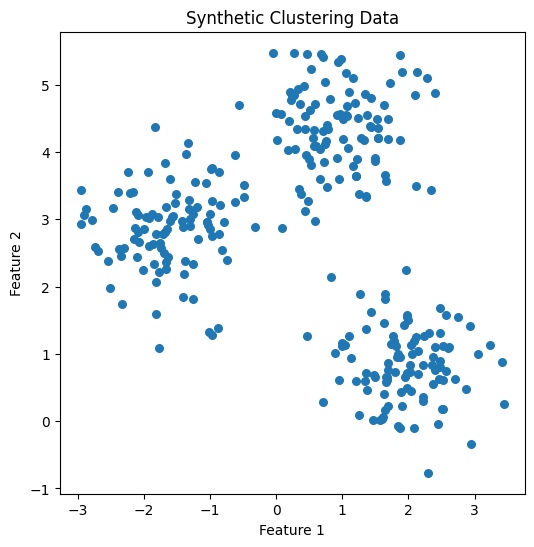

In [5]:
# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Visualize the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Clustering Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


K-Means Clustering

K-Means is a popular clustering algorithm that partitions the dataset into K clusters. It tries to minimize the within-cluster variance by assigning each data point to the nearest centroid.

Key Concepts in K-Means:

Centroids: The red ‘X’ marks the centroids of each cluster.

Cluster Labels: Each point is assigned to a cluster, as shown by the color.

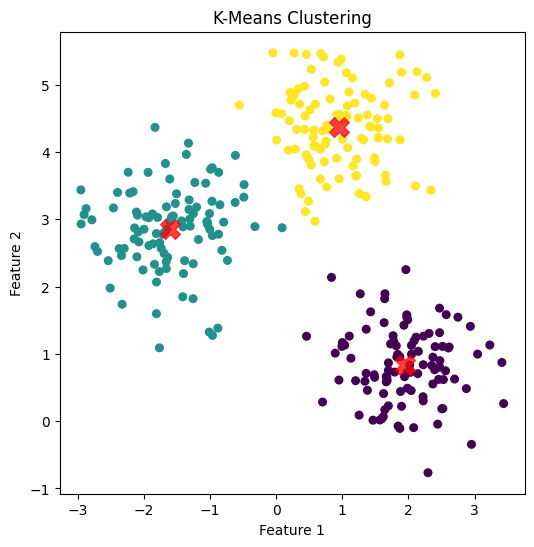

In [6]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get cluster labels
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that groups points that are close to each other based on distance. It also identifies outliers as noise (points that don't belong to any cluster).

Key Concepts in DBSCAN:

eps: The maximum distance between two points to be considered as neighbors.

min_samples: The minimum number of points required to form a dense region (a cluster).

Noise (outliers): Points that are marked as -1 are considered noise and not part of any cluster

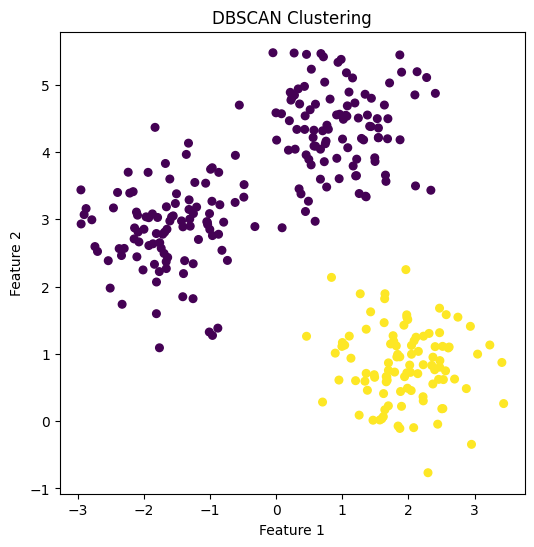

In [7]:
# Standardize the data before applying DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Hierarchical Clustering (Agglomerative Clustering)

Hierarchical Clustering builds a hierarchy of clusters by either a bottom-up (agglomerative) or top-down (divisive) approach. In agglomerative clustering, we begin with each point as its own cluster and iteratively merge the closest clusters.

Key Concepts in Hierarchical Clustering:

Dendrogram: The tree-like diagram represents the merging of clusters. The height of the branches represents the distance between clusters at which they were merged.


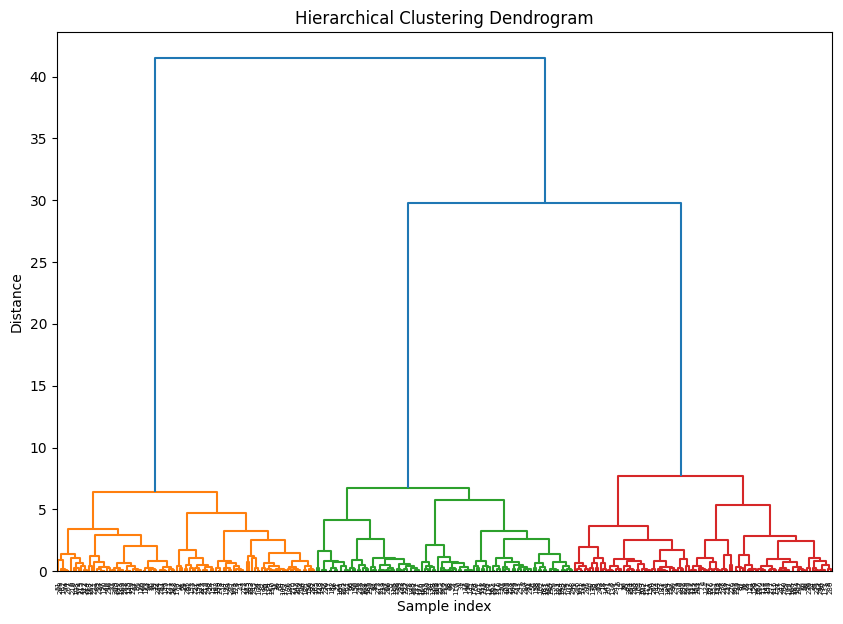

In [8]:
# Perform hierarchical clustering (Agglomerative Clustering)
Z = linkage(X, method='ward')  # Using 'ward' method for minimizing variance

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


You can set a threshold to cut the dendrogram and determine the number of clusters.

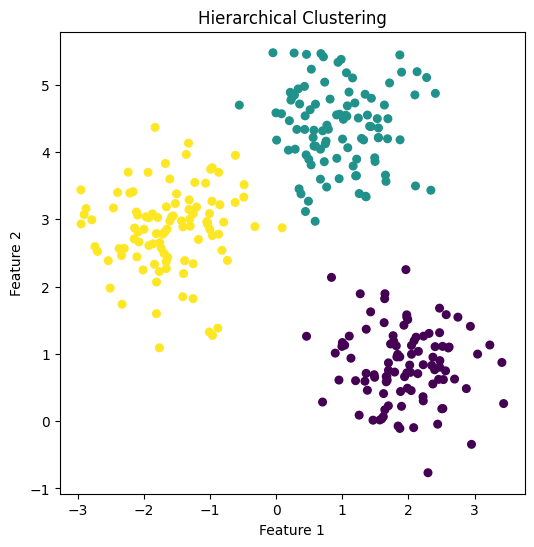

In [9]:
# Set a threshold to create clusters
from scipy.cluster.hierarchy import fcluster

# Define the maximum distance to cut the dendrogram
max_d = 10  # Distance threshold for clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Visualize the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Comparing Clustering Results

You can compare how well each algorithm performs using metrics such as Adjusted Rand Index (ARI) or Silhouette Score to evaluate cluster quality.

In [10]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Evaluate K-Means
print("K-Means Silhouette Score:", silhouette_score(X, y_kmeans))
print("K-Means Adjusted Rand Index:", adjusted_rand_score(y, y_kmeans))

# Evaluate DBSCAN
print("DBSCAN Silhouette Score:", silhouette_score(X, y_dbscan))
print("DBSCAN Adjusted Rand Index:", adjusted_rand_score(y, y_dbscan))

# Evaluate Hierarchical Clustering
print("Hierarchical Clustering Silhouette Score:", silhouette_score(X, clusters))
print("Hierarchical Clustering Adjusted Rand Index:", adjusted_rand_score(y, clusters))


K-Means Silhouette Score: 0.6596332095691734
K-Means Adjusted Rand Index: 1.0
DBSCAN Silhouette Score: 0.5543944954992497
DBSCAN Adjusted Rand Index: 0.5697841726618705
Hierarchical Clustering Silhouette Score: 0.6596332095691734
Hierarchical Clustering Adjusted Rand Index: 1.0


Notes

K-Means is fast and works well when the number of clusters is known in advance and the clusters are spherical.

DBSCAN is great for datasets with noise and clusters of arbitrary shapes but may not work well when clusters are unevenly sized.

Hierarchical Clustering provides a tree-like structure for clusters and is useful when you want to explore the hierarchical relationship between clusters.